In [67]:
# Constater comment évoluent les cours de l'Or, Argent et USD afin de constater s'il existe une relation

In [66]:
# Importation des librairies

import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [65]:
# Creation d'une classe se nommant "Cross_Asset_Analysis"
# Constructeur appelant automatiquement lorsqu'une nouvelle instance de la classe est créée
# "Self" permet d'accéder aux attributs et méthodes de l'objet. On initialise ensuite "period" avec la valeur fournie lors de la création de l'instance

class Cross_Asset_Analysis:  
    def __init__(self, period): 
        self.period = period 

# Récupération des cours de clôture d'un actif, sur une période spécifiée, en utilisant l'API Yahoo Finance
    def _fetch_data(self, ticker):
        return yf.download(ticker, period=self.period)['Close']
    
# USD
    def usd(self):
        return self._fetch_data('DX-Y.NYB')

# Gold   
    def au(self):
        return self._fetch_data('GC=F')

# Silver
    def ag(self):
        return self._fetch_data('SI=F')

# Récupération des données (en essayant) de chaque actif et en cas d'erreur, un message apparait

    def compare_growth(self):
        try:
            usd_data = self.usd()
            au_data = self.au()
            ag_data = self.ag()
        except Exception as e:
            raise RuntimeError("Error fetching data:")

# Récuperer les dates minimum et maxime de chaque actif 

        min_date = min(usd_data.index.min(), au_data.index.min(), ag_data.index.min())
        max_date = max(usd_data.index.max(), au_data.index.max(), ag_data.index.max())

# Filtrer les données entre la date minimale et maximale

        usd_data = usd_data.loc[min_date:max_date]
        au_data = au_data.loc[min_date:max_date]
        ag_data = ag_data.loc[min_date:max_date]

# Calcul du % de variations

        usd_pct_change = usd_data.pct_change().dropna()
        au_pct_change = au_data.pct_change().dropna()
        ag_pct_change = ag_data.pct_change().dropna()

        usd_cumulative = (1 + usd_pct_change).cumprod() - 1
        au_cumulative = (1 + au_pct_change).cumprod() - 1
        ag_cumulative = (1 + ag_pct_change).cumprod() - 1

        usd_cumulative_percent = usd_cumulative * 100
        au_cumulative_percent = au_cumulative * 100
        ag_cumulative_percent = ag_cumulative * 100

# Modélisation graphique 

        plt.figure(figsize=(12, 6))
        plt.plot(usd_cumulative_percent, label='USD Index (DXY)', color='blue', lw=1.2)
        plt.plot(au_cumulative_percent, label='Gold (AU)', color='orange', lw=1.2)
        plt.plot(ag_cumulative_percent, label='Silver (AG)', color='silver', lw=1.2)
        plt.title(f'GOLD vs SILVER vs USD {self.period}', fontsize=16)
        plt.xlabel('Date', fontsize=16)
        plt.ylabel('Cumulative Return (%)', fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.legend()
        plt.grid(True, ls='--', alpha=0.5)
        plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


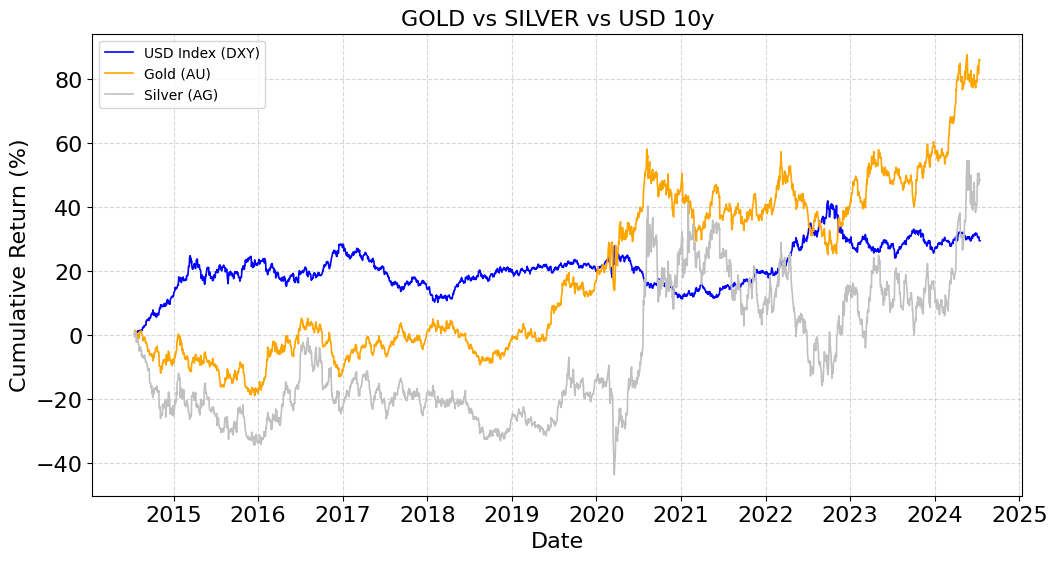

In [64]:
Cross_Asset_Analysis("10y").compare_growth()